In [1]:
import pandas as pd
import numpy as np
import os
from env import get_db_url
import wrangle
import seaborn as sns
from statistics import stdev
import matplotlib.pyplot as plt
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split


In [2]:
df = wrangle.get_zillow_data()

In [3]:
df.head()

,Number_of_Bedrooms,Number_of_Bathrooms,Square_Footage,Tax_Appraised_Value,Year_Built,Tax_Assessed,County_Code
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [14]:
df = wrangle.prepare_zillow_data(df)

In [15]:
df.head()

,Number_of_Bedrooms,Number_of_Bathrooms,Square_Footage,Tax_Appraised_Value,Year_Built,Tax_Assessed,County_Code
4,4,2.0,3633,296425,2005,6941.39,6037
6,3,4.0,1620,847770,2011,10244.94,6037
7,3,2.0,2077,646760,1926,7924.68,6037
18,3,1.0,1244,169471,1950,2532.88,6037
19,3,2.0,1300,233266,1950,3110.99,6037


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1193167 entries, 1195524 to 44507
Data columns (total 7 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Number_of_Bedrooms   1193167 non-null  int64  
 1   Number_of_Bathrooms  1193167 non-null  float64
 2   Square_Footage       1193167 non-null  int64  
 3   Tax_Appraised_Value  1193167 non-null  int64  
 4   Year_Built           1193167 non-null  int64  
 5   Tax_Assessed         1193167 non-null  float64
 6   County_Code          1193167 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 72.8 MB


array([[<AxesSubplot:title={'center':'Number_of_Bedrooms'}>,
        <AxesSubplot:title={'center':'Number_of_Bathrooms'}>,
        <AxesSubplot:title={'center':'Square_Footage'}>],
       [<AxesSubplot:title={'center':'Tax_Appraised_Value'}>,
        <AxesSubplot:title={'center':'Year_Built'}>,
        <AxesSubplot:title={'center':'Tax_Assessed'}>],
       [<AxesSubplot:title={'center':'County_Code'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

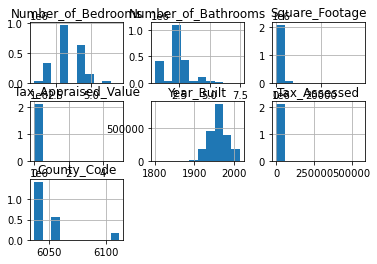

In [6]:
df.hist()

In [7]:
def split_zillow_data(df):
    ''' This function splits the cleaned dataframe into train, validate, and test 
    datasets and statrifies based on the target - Tax_Appraised_Value.'''

    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123)
    
    return train, validate, test

In [8]:
train, validate, test = split_zillow_data(df)

In [17]:
columns_to_scale = ['Number_of_Bedrooms','Number_of_Bathrooms', 'Square_Footage']

In [18]:
scaler = sklearn.preprocessing.MinMaxScaler()
train_scaled = train.copy()
train_scaled[columns_to_scale] = scaler.fit_transform(train_scaled[columns_to_scale])

In [12]:
train.columns

Index(['Number_of_Bedrooms', 'Number_of_Bathrooms', 'Square_Footage',
       'Tax_Appraised_Value', 'Year_Built', 'Tax_Assessed', 'County_Code'],
      dtype='object')

In [10]:
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(train)

train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

Text(0.5, 1.0, 'Scaled')

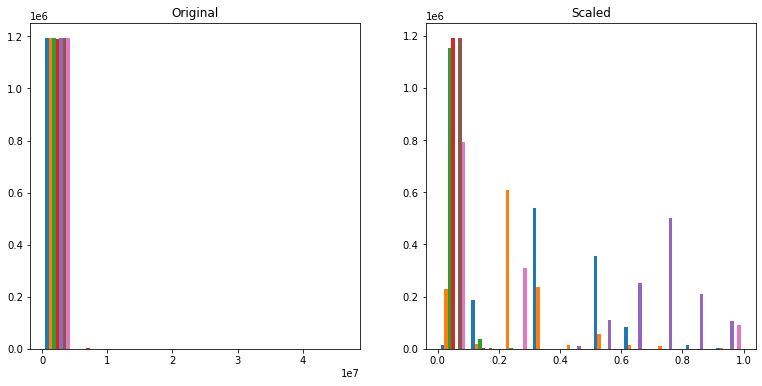

In [11]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train)
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled)
plt.title('Scaled')